In [79]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack
import fitsio
from astropy.io import fits

sys.path.append(os.path.expanduser('~/git/Python/user_modules/'))
from match_coord import match_coord

In [2]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [3]:
ccdnum_list = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 62]

ccd_ra = [-0.31244368,-0.00214103, 0.30855858,-0.46789986,-0.1573787 , 0.15336207,
  0.4637642 ,-0.62325889,-0.312972  ,-0.00212455, 0.30866507, 0.61908193,
 -0.77859061,-0.46870955,-0.15780883, 0.15334942, 0.46418217, 0.77441054,
 -0.77876058,-0.46892617,-0.15799484, 0.15333136, 0.46448109, 0.77444204,
 -0.93389515,-0.624237  ,-0.31362077,-0.00213867, 0.30892024, 0.61974856,
  0.92929411,-0.93410772,-0.62439031,-0.31379523,-0.00251046, 0.30860373,
  0.61929563, 0.92907893,-0.77928668,-0.46927775,-0.15819325, 0.15315534,
  0.464108  , 0.77408146,-0.7791703 ,-0.46938561,-0.15825837, 0.15269545,
  0.46382537, 0.77383443,-0.6239286 ,-0.31363566,-0.00262614, 0.30814956,
  0.61848423,-0.46862823,-0.15833137, 0.15254403, 0.46295505,-0.31333245,
  0.30765903]

ccd_dec = [ 0.90299039, 0.90274404, 0.90285652, 0.73894001, 0.73933177, 0.73919444,
  0.73865878, 0.5745655 , 0.57508801, 0.57510357, 0.57486577, 0.57414278,
  0.41001556, 0.41059824, 0.41088721, 0.41057117, 0.41032572, 0.40963196,
  0.24595122, 0.24597951, 0.24624207, 0.24619019, 0.24582139, 0.24534302,
  0.08128957, 0.08150002, 0.08130657, 0.08138846, 0.0810964 , 0.08093379,
  0.08089282,-0.08302691,-0.08319348,-0.08340522,-0.08351659,-0.08366242,
 -0.08355805,-0.08365399,-0.24756494,-0.2479717 ,-0.24812127,-0.24835309,
 -0.2482645 ,-0.2480924 ,-0.41173856,-0.41236738,-0.41281328,-0.41296242,
 -0.41270174,-0.41225407,-0.57638265,-0.57687683,-0.57711492,-0.57725814,
 -0.57674114,-0.74071528,-0.74115162,-0.74130891,-0.74095896,-0.9049206 ,
 -0.90515532]

In [157]:
dx = 4096+153 # CCD size + gap pixel size
dy = 2048+201 # CCD size + gap pixel size
half_dx = dx/2

# The upper (north) right (west) corner of N4 is (0, 0)
x = np.arange(-7, 8, 1) * half_dx
y = np.arange(-5, 7) * dy
xx, yy = np.meshgrid(x, y)
x_flat, y_flat = xx.flatten(), yy.flatten()
# Offset x and y to match the ccd_ra/ccd_dec
x_flat_offset, y_flat_offset = -x_flat, y_flat - dy/2
mesh_ra, mesh_dec = x_flat_offset*0.262/3600, y_flat_offset*0.262/3600

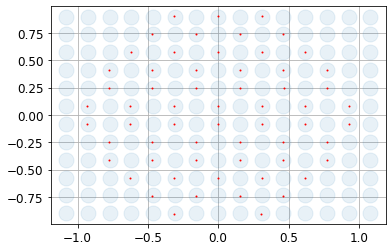

In [170]:
plt.plot(mesh_ra, mesh_dec, '.', ms=30, alpha=0.1)
plt.plot(ccd_ra, ccd_dec, 'r.', ms=2)
plt.grid()
plt.show()

Doubly matched objects = 0
Final matched objects = 61


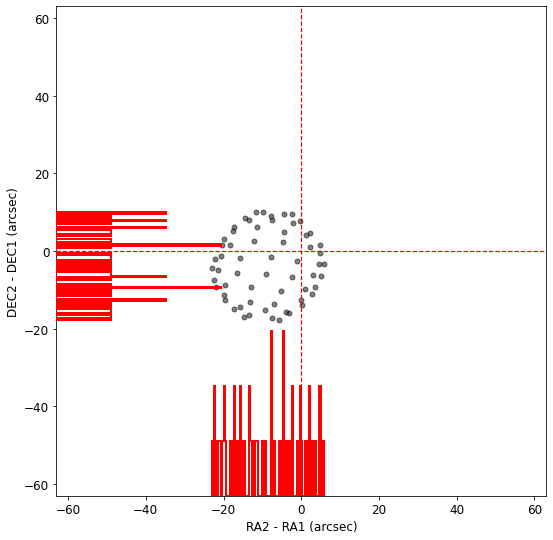

In [159]:
idx1, idx2, d2d, d_ra, d_dec = match_coord(mesh_ra, mesh_dec, ccd_ra, ccd_dec, search_radius=60., plot_q=True)

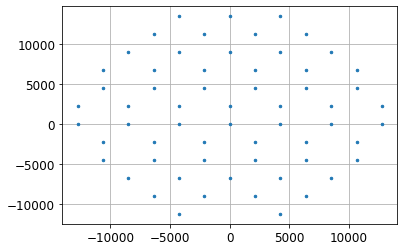

In [160]:
plt.plot(x_flat[idx1], y_flat[idx1], '.', ms=5, alpha=1)
plt.grid()
plt.show()

In [161]:
# Shift the origin to upper (north) right (west) corner of the focal plane
x_pix = -(x_flat[idx1] - x_flat[idx1].max())
y_pix = -(y_flat[idx1] - y_flat[idx1].max())

In [163]:
x_pix

array([ 8498. , 12747. , 16996. ,  6373.5, 10622.5, 14871.5, 19120.5,
        4249. ,  8498. , 12747. , 16996. , 21245. ,  2124.5,  6373.5,
       10622.5, 14871.5, 19120.5, 23369.5,  2124.5,  6373.5, 10622.5,
       14871.5, 19120.5, 23369.5,    -0. ,  4249. ,  8498. , 12747. ,
       16996. , 21245. , 25494. ,    -0. ,  4249. ,  8498. , 12747. ,
       16996. , 21245. , 25494. ,  2124.5,  6373.5, 10622.5, 14871.5,
       19120.5, 23369.5,  2124.5,  6373.5, 10622.5, 14871.5, 19120.5,
       23369.5,  4249. ,  8498. , 12747. , 16996. , 21245. ,  6373.5,
       10622.5, 14871.5, 19120.5,  8498. , 16996. ])

In [164]:
y_pix

array([    0,     0,     0,  2249,  2249,  2249,  2249,  4498,  4498,
        4498,  4498,  4498,  6747,  6747,  6747,  6747,  6747,  6747,
        8996,  8996,  8996,  8996,  8996,  8996, 11245, 11245, 11245,
       11245, 11245, 11245, 11245, 13494, 13494, 13494, 13494, 13494,
       13494, 13494, 15743, 15743, 15743, 15743, 15743, 15743, 17992,
       17992, 17992, 17992, 17992, 17992, 20241, 20241, 20241, 20241,
       20241, 22490, 22490, 22490, 22490, 24739, 24739])

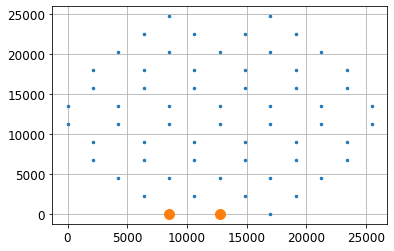

In [165]:
plt.plot(x_pix, y_pix, '.', ms=5, alpha=1)
plt.plot(x_pix[:2], y_pix[:2], '.', ms=20, alpha=1)
plt.grid()
plt.show()